# Interactions - Lab

## Introduction

In this lab, you'll explore interactions in the Boston Housing dataset.

## Objectives

You will be able to:
- Implement interaction terms in Python using the `sklearn` and `statsmodels` packages 
- Interpret interaction variables in the context of a real-world problem 

## Build a baseline model 

You'll use a couple of built-in functions, which we imported for you below: 

In [74]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Import the Boston data set using `load_boston()`. We won't bother to preprocess the data in this lab. If you still want to build a model in the end, you can do that, but this lab will just focus on finding meaningful insights in interactions and how they can improve $R^2$ values.

In [75]:
regression = LinearRegression()
boston = load_boston()

Create a baseline model which includes all the variables in the Boston housing data set to predict the house prices. Then use 10-fold cross-validation and report the mean $R^2$ value as the baseline $R^2$.

In [76]:
## code here
print(boston.keys())
print(boston.feature_names)
y= pd.DataFrame(boston.target,columns=['target'])
df = pd.DataFrame(boston.data,columns = boston.feature_names)
all_data = pd.concat([y,df],axis=1)

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [77]:
all_data

,target,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,24.0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,21.6,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,34.7,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,33.4,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,36.2,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,22.4,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,20.6,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,23.9,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,22.0,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [78]:


# calculate the mean of Rsquared from multiple models obtained through K-Fold process
# partition of df and y in 10 equal parts, creates 10 models using each time 1 out of the 10 parts as testing set
# and the other 9 out of 10 as training set, and changing everytime.
crossvalidation = KFold(n_splits=10,shuffle=True,random_state=1)
# baseline = np.mean(cross_val_score(regression,df,y,scoring='r2',cv=crossvalidation))
baseline_all = cross_val_score(regression,df,y,scoring='r2',cv=crossvalidation)
baseline=np.mean(baseline_all)

In [79]:
baseline

0.7190106820189471

In [80]:
# question: What is the difference between cv=KFold(n_splits=10,shuffle=True,random_state=1) and just cv=5  ?
baseline_all = cross_val_score(regression,df,y,scoring='r2',cv=crossvalidation)
baseline_alljust5 = cross_val_score(regression,df,y,scoring='r2',cv=10)


In [81]:
baseline_all

array([0.77863866, 0.76632537, 0.8729179 , 0.44002779, 0.84715141,
       0.71692423, 0.72093063, 0.59299064, 0.69816152, 0.75603868])

In [82]:
baseline_alljust5

array([ 0.73376082,  0.4730725 , -1.00631454,  0.64113984,  0.54766046,
        0.73640292,  0.37828386, -0.12922703, -0.76843243,  0.4189435 ])

In [83]:
np.mean(baseline_all), np.mean(baseline_alljust5)

(0.7190106820189471, 0.20252899006054909)

In [84]:
baseline_all_mse = cross_val_score(regression,df,y,scoring='neg_mean_squared_error',cv=crossvalidation)
baseline_alljust5_mse = cross_val_score(regression,df,y,scoring='neg_mean_squared_error',cv=10)

In [85]:
baseline_all_mse


array([-20.54427466, -24.47650033,  -9.49619045, -48.63290854,
       -12.11906454, -18.14673907, -17.53359386, -38.67822303,
       -34.22829546, -13.73556966])

In [86]:
baseline_alljust5_mse

array([  -9.28694671,  -14.15128316,  -14.07360615,  -35.20692433,
        -31.88511666,  -19.83587796,   -9.94726918, -168.37537954,
        -33.32974507,  -10.96041068])

## See how interactions improve your baseline

Next, create all possible combinations of interactions, loop over them and add them to the baseline model one by one to see how they affect the $R^2$. We'll look at the 3 interactions which have the biggest effect on our $R^2$, so print out the top 3 combinations.

You will create a `for` loop to loop through all the combinations of 2 predictors. You can use `combinations` from itertools to create a list of all the pairwise combinations. To find more info on how this is done, have a look [here](https://docs.python.org/2/library/itertools.html).

In [87]:
from itertools import combinations
combinations = list(combinations(boston.feature_names, 2))
# Return 2-length subsequences of elements from the input iterable boston.feature_names.

In [88]:
print(boston.feature_names)
print(combinations)


['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
[('CRIM', 'ZN'), ('CRIM', 'INDUS'), ('CRIM', 'CHAS'), ('CRIM', 'NOX'), ('CRIM', 'RM'), ('CRIM', 'AGE'), ('CRIM', 'DIS'), ('CRIM', 'RAD'), ('CRIM', 'TAX'), ('CRIM', 'PTRATIO'), ('CRIM', 'B'), ('CRIM', 'LSTAT'), ('ZN', 'INDUS'), ('ZN', 'CHAS'), ('ZN', 'NOX'), ('ZN', 'RM'), ('ZN', 'AGE'), ('ZN', 'DIS'), ('ZN', 'RAD'), ('ZN', 'TAX'), ('ZN', 'PTRATIO'), ('ZN', 'B'), ('ZN', 'LSTAT'), ('INDUS', 'CHAS'), ('INDUS', 'NOX'), ('INDUS', 'RM'), ('INDUS', 'AGE'), ('INDUS', 'DIS'), ('INDUS', 'RAD'), ('INDUS', 'TAX'), ('INDUS', 'PTRATIO'), ('INDUS', 'B'), ('INDUS', 'LSTAT'), ('CHAS', 'NOX'), ('CHAS', 'RM'), ('CHAS', 'AGE'), ('CHAS', 'DIS'), ('CHAS', 'RAD'), ('CHAS', 'TAX'), ('CHAS', 'PTRATIO'), ('CHAS', 'B'), ('CHAS', 'LSTAT'), ('NOX', 'RM'), ('NOX', 'AGE'), ('NOX', 'DIS'), ('NOX', 'RAD'), ('NOX', 'TAX'), ('NOX', 'PTRATIO'), ('NOX', 'B'), ('NOX', 'LSTAT'), ('RM', 'AGE'), ('RM', 'DIS'), ('RM', 'RAD'), ('RM', 'TAX'), (

In [89]:
len(combinations)

78

In [92]:
## code to find top  interactions by R^2 value 
rsquared_list = []
for combi in combinations:
    df['interaction']= df[combi[0]]*df[combi[1]]
    crossvalidation = KFold(n_splits=10,shuffle=True,random_state=1)
    rsquared_list.append (np.mean (cross_val_score(regression,df,y,scoring='r2',cv=crossvalidation)))


In [126]:
result = list(zip(combinations,rsquared_list))
# sorted(result, key = lambda x:x[1])[:5]
sorted(result, key = lambda x:x[1],reverse=True)[:3]



[(('RM', 'LSTAT'), 0.7864889421124031),
 (('RM', 'TAX'), 0.7750525123747648),
 (('RM', 'RAD'), 0.7682152400234055)]

## Look at the top 3 interactions: "RM" as a confounding factor

The top three interactions seem to involve "RM", the number of rooms as a confounding variable for all of them. Let's have a look at interaction plots for all three of them. This exercise will involve:

- Splitting the data up in 3 groups: one for houses with a few rooms, one for houses with a "medium" amount of rooms, one for a high amount of rooms 
- Create a function `build_interaction_rm()`. This function takes an argument `varname` (which can be set equal to the column name as a string) and a column `description` (which describes the variable or varname, to be included on the x-axis of the plot). The function outputs a plot that uses "RM" as a confounding factor. Each plot should have three regression lines, one for each level of "RM"  

The data has been split into high, medium, and low number of rooms for you.

In [127]:
type(np.asarray(df[['RM']]).reshape(len(df[['RM']])))

numpy.ndarray

In [128]:
np.asarray(df[['RM']]).reshape(len(df[['RM']])).shape

(506,)

In [129]:
np.asarray(df[['RM']]).reshape(len(df[['RM']]))

array([6.575, 6.421, 7.185, 6.998, 7.147, 6.43 , 6.012, 6.172, 5.631,
       6.004, 6.377, 6.009, 5.889, 5.949, 6.096, 5.834, 5.935, 5.99 ,
       5.456, 5.727, 5.57 , 5.965, 6.142, 5.813, 5.924, 5.599, 5.813,
       6.047, 6.495, 6.674, 5.713, 6.072, 5.95 , 5.701, 6.096, 5.933,
       5.841, 5.85 , 5.966, 6.595, 7.024, 6.77 , 6.169, 6.211, 6.069,
       5.682, 5.786, 6.03 , 5.399, 5.602, 5.963, 6.115, 6.511, 5.998,
       5.888, 7.249, 6.383, 6.816, 6.145, 5.927, 5.741, 5.966, 6.456,
       6.762, 7.104, 6.29 , 5.787, 5.878, 5.594, 5.885, 6.417, 5.961,
       6.065, 6.245, 6.273, 6.286, 6.279, 6.14 , 6.232, 5.874, 6.727,
       6.619, 6.302, 6.167, 6.389, 6.63 , 6.015, 6.121, 7.007, 7.079,
       6.417, 6.405, 6.442, 6.211, 6.249, 6.625, 6.163, 8.069, 7.82 ,
       7.416, 6.727, 6.781, 6.405, 6.137, 6.167, 5.851, 5.836, 6.127,
       6.474, 6.229, 6.195, 6.715, 5.913, 6.092, 6.254, 5.928, 6.176,
       6.021, 5.872, 5.731, 5.87 , 6.004, 5.961, 5.856, 5.879, 5.986,
       5.613, 5.693,

In [130]:
rm = np.asarray(df[['RM']]).reshape(len(df[['RM']]))


In [131]:
rm.shape,type(rm)

((506,), numpy.ndarray)

In [132]:
all_data

,target,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,24.0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,21.6,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,34.7,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,33.4,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,36.2,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,22.4,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,20.6,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,23.9,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,22.0,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [133]:
high_rm = all_data[rm > np.percentile(rm, 67)]    
med_rm = all_data[(rm > np.percentile(rm, 33)) & (rm <= np.percentile(rm, 67))]
low_rm = all_data[rm <= np.percentile(rm, 33)]

# note it works even if rm and all data hare 2 separate objects, because rm has the same length than all_data!!!

In [142]:
all_data['RM'].describe()

count    506.000000
mean       6.284634
std        0.702617
min        3.561000
25%        5.885500
50%        6.208500
75%        6.623500
max        8.780000
Name: RM, dtype: float64

In [145]:
low_rm.head()


,target,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
8,16.5,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
12,21.7,0.09378,12.5,7.87,0.0,0.524,5.889,39.0,5.4509,5.0,311.0,15.2,390.50,15.71
13,20.4,0.62976,0.0,8.14,0.0,0.538,5.949,61.8,4.7075,4.0,307.0,21.0,396.90,8.26
15,19.9,0.62739,0.0,8.14,0.0,0.538,5.834,56.5,4.4986,4.0,307.0,21.0,395.62,8.47
16,23.1,1.05393,0.0,8.14,0.0,0.538,5.935,29.3,4.4986,4.0,307.0,21.0,386.85,6.58


Create `build_interaction_rm()`.

In [167]:
print(high_rm['RM'].shape)
print(high_rm['RM'].values.shape)
print(high_rm['RM'].values.reshape(-1, 1).shape)

(167,)
(167,)
(167, 1)


In [169]:
print(type(high_rm['RM'].shape))
print(type(high_rm['RM'].values.shape))
print(type(high_rm['RM'].values.reshape(-1, 1).shape))

<class 'tuple'>
<class 'tuple'>
<class 'tuple'>


In [182]:
def build_interaction_rm(varname, description):
    # We have split RM in 3 low/med/high.
    # this function fits 3 single-variable linear model using 'varname' to predict target, one for each rm category
    # then displays the 3 models over a scatterplot target (y) vs. 'varname' (x)
    # The goal is to measure the interaction effect between 'varname' and rm 
    
    # varname is a variable name - string
    # description is a label for x axis - string
    
    linreg_high = LinearRegression()
    linreg_med = LinearRegression()
    linreg_low = LinearRegression()
    
    y_high = high_rm['target']
    y_med  =  med_rm['target']
    y_low  =  low_rm['target']
    
    linreg_high.fit(high_rm[varname].values.reshape(-1, 1),y_high)
    linreg_med.fit( med_rm[varname].values.reshape(-1, 1), y_med)
    linreg_low.fit( low_rm[varname].values.reshape(-1, 1), y_low)

    pred_high=linreg_high.predict(high_rm[varname].values.reshape(-1, 1))
    pred_med =linreg_med.predict( med_rm[varname].values.reshape(-1, 1))
    pred_low =linreg_low.predict( low_rm[varname].values.reshape(-1, 1))
    
    # plot outputs
    plt.figure(figsize=(10,6))
    plt.scatter(high_rm[varname],y_high,color='blue',alpha=0.3,label = 'high RM' )
    plt.scatter(med_rm[varname],y_med,color='red',alpha=0.3,label = 'med RM' )
    plt.scatter(low_rm[varname],y_low,color='orange',alpha=0.3,label = 'low RM' )
    plt.plot(high_rm[varname],pred_high,color='blue',linewidth=2)
    plt.plot(med_rm[varname],pred_med,color='red',linewidth=2)
    plt.plot(low_rm[varname],pred_low,color='orange',linewidth=2)
    plt.xlabel(description)
    plt.legend()
    plt.show();
    
    return None

Next, use `build_interaction_rm()` with the three variables that came out with the highest effect on $R^2$. 

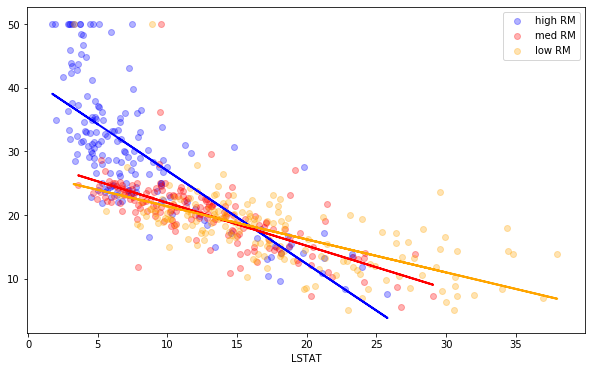

In [183]:
# first plot
build_interaction_rm('LSTAT','LSTAT')

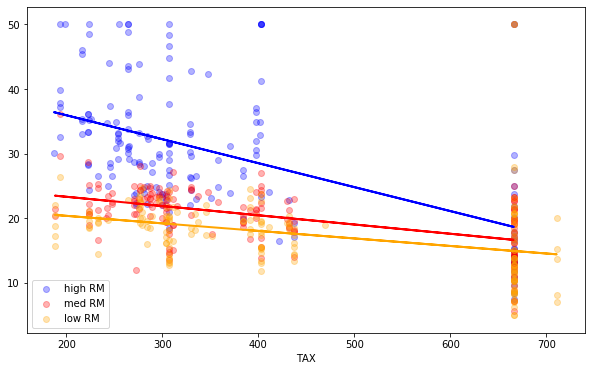

In [184]:
# second plot
build_interaction_rm('TAX','TAX')

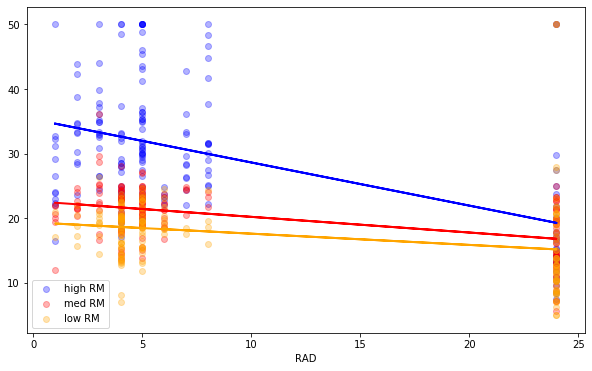

In [185]:
# third plot
build_interaction_rm('RAD','RAD')

## Build a final model including all three interactions at once

Use 10-fold cross-validation to build a model using all the above interactions. 

In [186]:
linregression=LinearRegression()
crossvalidation= KFold(n_splits=10,shuffle=True,random_state=1)

# copy of df where we will create new features by multiplicating interacting variables (2 by 2)
df_inter=df.copy()
df_inter['RM_LSTAT'] = df['RM']*df['LSTAT']
df_inter['RM_TAX'] = df['RM']*df['TAX']
df_inter['RM_RAD'] = df['RM']*df['RAD']

final_model = np.mean(cross_val_score(regression,df_inter,y,scoring='r2',cv=crossvalidation))


In [187]:
final_model

0.7851761763556208

Our $R^2$ has increased considerably! Let's have a look in `statsmodels` to see if all these interactions are significant.

In [188]:
# code here
import statsmodels.api as sm
df_inter_sm = sm.add_constant(df_inter)
model= sm.OLS(y,df_inter_sm)
results=model.fit()

C:\Users\poari\Anaconda3\envs\learn-env\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [193]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     126.6
Date:                Thu, 16 Apr 2020   Prob (F-statistic):          1.87e-166
Time:                        14:36:31   Log-Likelihood:                -1413.2
No. Observations:                 506   AIC:                             2862.
Df Residuals:                     488   BIC:                             2938.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         -16.8732      7.615     -2.216      0.027     -31.835      -1.912
CRIM           -0.1618      0.028     -5.720      0.000      -0.217      -0.106
ZN              0.0174      0.012      1.461      0.145      -0.006       0.041
INDUS           0.0944      0.053      1.787      0.075      -0.009       0.198
CHAS            2.6096      0.740      3.527      0.000       1.156       4.064
NOX           -13.4446      3.275     -4.105      0.000     -19.880      -7.009
RM             10.6918      0.992     10.778      0.000       8.743      12.641
AGE             0.0072      0.011      0.628      0.530      -0.015       0.030
DIS            -0.9510      0.175     -5.449      0.000      -1.294      -0.608
RAD             0.6610      0.478      1.383      0.167      -0.278       1.600
TAX             0.0344      0.025      1.400      0.162      -0.014       0.083
PTRATIO        -0.6957      0.113     -6.147      0.000      -0.918      -0.473
B               0.0128      0.007      1.814      0.070      -0.001       0.027
LSTAT           1.2738      0.253      5.041      0.000       0.777       1.770
interaction    -0.0004      0.000     -1.201      0.230      -0.001       0.000
RM_LSTAT       -0.2896      0.041     -7.116      0.000      -0.370      -0.210
RM_TAX         -0.0074      0.004     -1.870      0.062      -0.015       0.000
RM_RAD         -0.0621      0.078     -0.793      0.428      -0.216       0.092
==============================================================================
Omnibus:                      252.409   Durbin-Watson:                   1.083
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2471.073
Skew:                           1.944   Prob(JB):                         0.00
Kurtosis:                      13.104   Cond. No.                     2.40e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.4e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

What is your conclusion here?

In [194]:
# RM_LSTAT is significant p-value =0
# RM_TAX is on the edge (assuming significance level at 5%) with p-value of 6%
# RM_RAD seems insignificant with p-value of 43%
#it might be worth checking how the R^2 changes again when just including 2 interactions instead of 3 in the final model.'

## Summary

You should now understand how to include interaction effects in your model! As you can see, interactions can have a strong impact on linear regression models, and they should always be considered when you are constructing your models.